<a href="https://colab.research.google.com/github/tongnamuu/Tensorflow_Tutorials/blob/master/Tensorflow_tutorials_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tf-nightly
import tensorflow_datasets as tfds
import tensorflow as tf

     |████████████████████████████████| 516.4MB 32kB/s 
     |████████████████████████████████| 460kB 40.6MB/s 
     |████████████████████████████████| 2.8MB 23.0MB/s 
     |████████████████████████████████| 778kB 36.9MB/s 


In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [4]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIWHF77/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIWHF77/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIWHF77/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [0]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = (train_examples.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_dataset = (test_examples.padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 127s 325ms/step - loss: 0.6694 - accuracy: 0.5239 - val_loss: 0.5233 - val_accuracy: 0.7750
Epoch 2/10
391/391 [==============================] - 124s 317ms/step - loss: 0.3648 - accuracy: 0.8453 - val_loss: 0.3402 - val_accuracy: 0.8615
Epoch 3/10
391/391 [==============================] - 122s 313ms/step - loss: 0.2679 - accuracy: 0.8949 - val_loss: 0.3629 - val_accuracy: 0.8562
Epoch 4/10
391/391 [==============================] - 121s 309ms/step - loss: 0.2188 - accuracy: 0.9191 - val_loss: 0.3528 - val_accuracy: 0.8651
Epoch 5/10
391/391 [==============================] - 120s 306ms/step - loss: 0.1905 - accuracy: 0.9317 - val_loss: 0.3466 - val_accuracy: 0.8734
Epoch 6/10
391/391 [==============================] - 121s 310ms/step - loss: 0.1684 - accuracy: 0.9407 - val_loss: 0.3351 - val_accuracy: 0.8667
Epoch 7/10
391/391 [==============================] - 124s 316ms/step - loss: 0.1518 - accuracy: 0.9474 - val_loss: 0.3737 -

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 47s 120ms/step - loss: 0.4355 - accuracy: 0.8579
Test Loss: 0.43549954891204834
Test Accuracy: 0.8578799962997437


In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)

  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [17]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-0.06607039]]


In [18]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-0.13775799]]


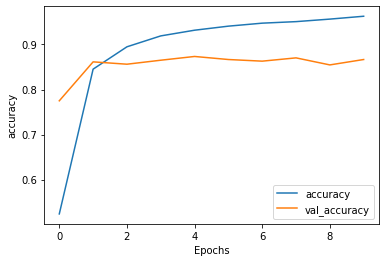

In [19]:
plot_graphs(history, 'accuracy')

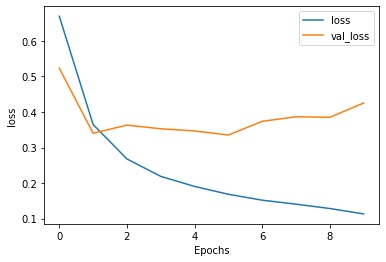

In [20]:
plot_graphs(history, 'loss')

In [0]:
# Another Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 234s 599ms/step - loss: 0.6725 - accuracy: 0.5396 - val_loss: 0.5706 - val_accuracy: 0.6953
Epoch 2/10
391/391 [==============================] - 232s 593ms/step - loss: 0.4155 - accuracy: 0.8252 - val_loss: 0.3814 - val_accuracy: 0.8224
Epoch 3/10
391/391 [==============================] - 228s 583ms/step - loss: 0.2966 - accuracy: 0.8871 - val_loss: 0.3561 - val_accuracy: 0.8526
Epoch 4/10
391/391 [==============================] - 229s 587ms/step - loss: 0.2351 - accuracy: 0.9188 - val_loss: 0.3419 - val_accuracy: 0.8630
Epoch 5/10
391/391 [==============================] - 231s 591ms/step - loss: 0.1993 - accuracy: 0.9317 - val_loss: 0.3557 - val_accuracy: 0.8734
Epoch 6/10
391/391 [==============================] - 233s 596ms/step - loss: 0.1741 - accuracy: 0.9456 - val_loss: 0.3796 - val_accuracy: 0.8562
Epoch 7/10
391/391 [==============================] - 232s 593ms/step - loss: 0.1568 - accuracy: 0.9528 - val_loss: 0.4278 -

In [24]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 91s 232ms/step - loss: 0.5261 - accuracy: 0.8480
Test Loss: 0.5261233448982239
Test Accuracy: 0.8479599952697754


In [25]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.3208666]]


In [26]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-2.77925]]


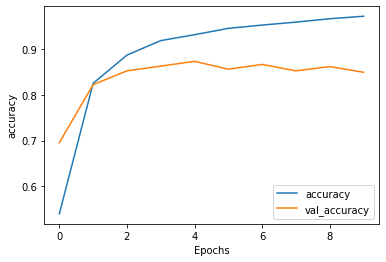

In [27]:
plot_graphs(history, 'accuracy')

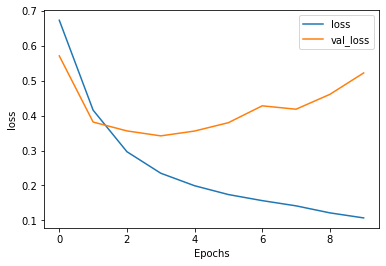

In [28]:
plot_graphs(history, 'loss')